## A Taste to the Juxtorpus - ATAP Webinar 25/May/2023

#### Dr Chao Sun  
  
  


<span style="font-size:16px;">

This notebook introduces and showcases some usages of the ATAP Juxtorpus tool, which includes two major components: **Corpus** and **Jux**. 
The **Corpus** package enables the user to upload, select and build their texts as a Corpus object. The Corpus can then be explored and sliced flexibly into sub-corpus based on various metadata or text patterns within the contents. Several out-of-box tools and visualisations come with the Corpus object so that the user can quickly explore the Corpus and sub-Corpus in a unified manner, and more functions will be developed for similar purposes.

The **Jux** package, on the other hand, is a more straightfoward tool designed to compare and identify the contrasts between a pair of corpora. Although this sounds like a simple task, when this is conducted on corpora that are creatively refined, and by using different metrics of comparison, a lot of insights can be revealed from this comparison.

Besides the two new packages to the ATAP text analytic tool suite, this notebook will also demostrate how other ATAP tools can be used together with the corpus in order to create a reuseable workflow for your research, these include [Concordance Tool](), [Quotations Tool](), [Keyword Analysis](), and the yet to be integrated [_Semantic Tagger_](), [_Text Similarity Scorer_](), [_Discursis_]() etc.

Interactive Widgets were developed for a few common functions to make the operations easier for users who are not completely confident on complicated codes, however not all functionalities have been implemented as widgets.
</span>
<div class="alert alert-block alert-warning" style="font-size:14px;">
<b>User guide to using a Jupyter Notebook</b> 

If you are new to Jupyter Notebook, feel free to take a quick look at [this user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for basic information on how to use a notebook.
</div>


<div class="alert alert-block alert-info" style="font-size:14px;">
    
For more tools and information about the [**ATAP**](www.atap.edu.au) project, or the sibling digital HASS infrastructure project [**LDaCA**](www.ldaca.edu.au), please visit the websites: [www.atap.edu.au](www.atap.edu.au) and [www.ldaca.edu.au](www.ldaca.edu.au).
</div>

In [ ]:
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

In [ ]:
import os
while 'juxtorpus' not in os.listdir():
    os.chdir('../')
# if  not 'juxtorpus' in os.listdir():
#     os.chdir('../../../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

# imports
import pandas as pd
from pathlib import Path
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

from juxtorpus.corpus import Corpus
from juxtorpus.corpus.processors import process
from juxtorpus.corpus.app import App
from juxtorpus.viz.corpus import timeline, timelines, wordcloud, wordclouds
from juxtorpus.viz.item_timeline import ItemTimeline
from juxtorpus.matchers import is_hashtag

from juxtorpus import Jux
from juxtorpus import analyse
from juxtorpus.corpus.corpora import Corpora

import warnings
warnings.filterwarnings('ignore')

from atap_widgets.concordance import ConcordanceTable, ConcordanceWidget, ConcordanceLoader
from atap_widgets.concordance import prepare_text_df
from quotation_tool import QuotationTool

from collections import Counter
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.matcher import Matcher

pd.set_option('display.max_colwidth', 255)

# 1. Corpus Building and Exploration

<span  style="font-size:14px;">

The **Corpus** package is the essential platform for text operations and explorations. Users can upload or link their text collections with associated metadata, then compile the selected texts as a *Corpus* object. A *Corpus* object consists of a number of *documents* and the metadata that describe the documents, such as *title*, *publish date*, *author*, *word count* etc.  
A corpus can be built with either codes or an interactive widget within this notebook. When the input data are in the format of a spreadsheet, each row of data will be come one document. The user needs to specify the column for the text contents, and all other columns are compiled as associating metadata. The data type, e.g. *numeric*, *text*, *datetime*, *category*, need to be determined on the corpus building, and this affects how each meta data can be used in the further slicing operations.  
Once a corpus is built, the user is provided some basic out-of-box tools to explore the text contents or metadata, such as generating a word frequency table, plotting a word cloud, create a timeline plot of the documents or certain patterns in the text, or to perform certain analysis on the corpus with either ATAP or external tools, e.g. running *concordance tool*, *quotation tool* or *LDA topic modelling* etc.  
    
**This section will demonstrate how to upload your text, build a corpus and explore the contents as a start.**

</span>


## 1.1 Upload your text and build a Corpus with corpus.widget()

<span  style="font-size:14px;">
    
The **Corpora()** creates a corpus container that holds many Corpus objects. Each corpus can be built and named within the builder widget after the text contents are uploaded. Once the column of text is selected, and the data type of each meta data is set, the user can name the corpus and click on the button **Build**. If no name is manually given, a random name will be given to the corpus.
</span>

In [ ]:
corpora = Corpora()
corpora.widget()

<div class="alert alert-block alert-warning" style="font-size:14px;">
<b>About the data</b> 

The uploaded data is a processed subset of a [Kaggle twitter dataset on Customer Service](https://www.kaggle.com/datasets/thoughtvector/customer-support-on-twitter), and in this example we have included tweet messages posted between 10/2017 and 11/2017 about 4 companies (SpotifyCares, ComcastCares, AmericanAir, British_Airways).
</div>

##### The Corpus we just built consists tweet conversations between customer cares of four companies and their happy/angry customers. It has been named as _CS_, and we will later explore its contents at different levels and granurities.

In [ ]:
corpora.items()

## 1.2 A few basic operations on your corpus
### A summary of your corpus

In [ ]:
corpus = corpora['CS']
corpus.summary()

### Check the contents of the documents in the corpus

In [ ]:
corpus.docs().head(5)
# corpora['CS'].to_dataframe().head(15)

### Check the contents of certain corpus meta data

In [ ]:
companies = corpora['CS'].meta['company'].series.unique().tolist()
print(companies)

### Generating a frequency table from the corpus

In [ ]:
corpora['CS'].dtm.freq_table().series.sort_values(ascending=False)
#corpora['CS'].dtm.freq_table().series.sort_values(ascending=False).to_csv('./notebooks/demos/taster_workshop/freq_table.csv')

## 1.3 Some visualisation from the corpus

### **Wordcloud** 
#### We can easily generate a wordcloud out of the corpus, and exclude certain words if they are blocking the view.

In [ ]:
#stop_words = ['https'] + companies
corpora['CS'].viz.wordcloud()

#### Create a subcorpus by randomly sampling the corpus, then display wordcloud out of that sub-corpus

In [ ]:
stop_words = ['https'] + companies
subcorpus = corpora['CS'].sample(100)
subcorpus.viz.wordcloud(stopwords = stop_words)
subcorpus.summary().T

### **Concordance Tool**

### Use the [ATAP Concordance Tool](https://github.com/Australian-Text-Analytics-Platform/atap_widgets/tree/main) to check some corpus the contents and search for the contexts.
<div class="alert alert-block alert-warning" style="font-size:14px;">
<b>ATAP Concordance Tool</b> 
The ATAP Concordance Tool is a widget developed by the Sydney Informatics Hub under the ATAP project so that the user could interactively search keyword and display the contexts around the keywords within a jupyter notebook. The widget can be used independently if needed.
</div>
<div class="alert alert-block alert-danger" style="font-size:14px;">
<b>Warning</b> 
The ATAP Concordance Tool is not designed to be used on large corpus. Make sure you do not input a large corpus to avoid long loading time. For this twitter dataset, it can process roughly 80 tweets per second, i.e. a corpus with 1000 tweets will take ~13 seconds to load and display.
</div>

In [ ]:
import time
st = time.time()
conc = ConcordanceLoader(type='corpus', df_input = subcorpus)
conc.show()
print(time.time() - st, 'seconds')

### **Timeline**
### With datetime metadata in this corpus, we can plot some timelines to view the historical activities.

In [ ]:
corpora['CS'].viz.timeline('created_at', freq='1D')
# corpora['CS'].viz.timeline('created_at', freq='1D', meta_name='conversation')

## 1.4 Build a corpus with code
<div class="alert alert-block alert-info" style="font-size:14px;">
<b>Using the Code or Widget</b>
    
The Juxtorpus is a python package developed to work without notebook, thus all operations can be done through python functions in code.

On the other hand, some widgets are developed as additional interactive components specifically for work on notebooks, with a purpose to make some common tasks easier for people with less coding skills. The widgets may not cover all the functions available in Juxtorpus, and sometimes it's easier to modify and repeat task in a chunk of code.
</div>

### The following is an example to build a corpus from a pre-exist CSV file

<div class="alert alert-block alert-warning" style="font-size:14px;">
    
In order to build your corpus with codes, you need to know the structure of your data, e.g. file path, file type, headers, data types of all metadata, and some understanding about the [Pandas](https://pandas.pydata.org) Dataframe.
</div>


In [ ]:
use_cols = ['text', 'text_name', 'author', 'date', 'source']
dtypes = {'text': str, 
        'text_name': str, 
        'author':str,
        'date': str,
        'source':'category'}

df = pd.read_excel(Path('./notebooks/demos/taster_workshop/news.xlsx'),
                 usecols=use_cols, 
                 dtype=dtypes)
df['date'] = pd.to_datetime(df['date'])
corpus = Corpus.from_dataframe(df, col_doc='text', name='News')

corpora.add(corpus)

In [ ]:
# # The Customer Service Corpus can be built with the following code.
# corpora = Corpora()
# use_cols = ['author_id', 'inbound', 'created_at', 'text', 'in_response_to_tweet_id', 'company', 'conversation']
# # dtypes = ['Int64', 'category', 'string', 'string', 'Int64', 'Int64', 'category', 'category']

# df = pd.read_csv(Path('./notebooks/demos/taster_workshop/twcs_sel.csv'),
#                  usecols=use_cols, 
#                  dtype={'author_id': str,
#                         'inbound': 'category',
#                         'created_at': str,
#                         'text':str,
#                         'in_response_tweet_id': 'Int64',
#                         'company': 'category', 
#                         'conversation': 'category'})

# df['created_at'] = pd.to_datetime(df['created_at'])
# # #corpus = process(Corpus.from_dataframe(df, col_doc='text', name='auspol'), nlp=spacy.blank('en'))
# corpus = Corpus.from_dataframe(df, col_doc='text', name='CS')
# corpora.add(corpus)

# 2. Corpus Slicing
<div class="alert alert-block alert-info" style="font-size:14px;">
    
A slicing operation can be done through the corpora.widget().  
When a corpus is selected in the widget, the slicer pane expands and the corpus can be sliced based on the metadata. 
    
The slicing operations vary according to different data types of the used metadata, and the user can add and combine different operations for slicing a corpus.  
Within the widget, the size of new sub-corpus is displayed for the user's information.
</div>

## 2.1 Slicing with the widget

In [ ]:
corpora.widget()
# Create a "Customer" and a "Service" corpus

## 2.2 Slicing with codes
<div class="alert alert-block alert-info" style="font-size:14px;">
    
Depending on the data type of meta data, several functions can be used to slice your corpus. The user can call the slicer functions **corpus.slicer.filter_by_xxx()** with appropriate arguments, e.g.  
Categorical metadata: use _corpus.slicer.filter_by_item()_  
Datetime metadata: use _corpus.slicer.filter_by_datetime()_  
Numeric metadata: use _corpus.slicer.filter_by_range()_  
Text data: use _corpus.slicer.filter_by_regex()_   
And for more general and complex situtation, the user can define the slicing criteria and use _corpus.slicer.filter_by_condition()_ function.  
For more information, refer to the [Juxtorpus documentations]() (_under development_).
</div>

<span style="font-size:14px;">

In the following cell, we create four sub-corpora that consist of _inbound_ messages (from the customers) to each of the four companies, _AmericanAir_, _British_Airway_, _ComCast (telecommunication)_ and _Spotify_).  
Each of these sub-corpora are added into the corpora, and can be sliced further within the widget.
</span>

In [ ]:
temp = corpora['CS'].slicer.filter_by_item('inbound', 'True')
# temp = corpora['Customer']
AA_C = temp.slicer.filter_by_item('company', 'americanair')
AA_C.rename('AA_C')
BA_C = temp.slicer.filter_by_item('company', 'british_airways')
BA_C.rename('BA_C')
CC_C = temp.slicer.filter_by_item('company', 'comcastcares')
CC_C.rename('CC_C')
SP_C = temp.slicer.filter_by_item('company', 'spotifycares')
SP_C.rename('SP_C')
corpora.add([AA_C, BA_C, CC_C, SP_C])
corpora.items()

<div class="alert alert-block alert-warning" style="font-size:14px;">
<b>

## What is a sub-corpus
</b>
    
Each sub-corpus has a parent-corpus which indicates from which corpus the current corpus is sliced from, however a sub-corpus is still a corpus covering a sub-set documents of the original corpus, and everything works with a corpus can be done on a sub-corpus. 
A sub-corpus can be explored with the exact same functions and visualisations, e.g. the new _Frequency table_, _Word cloud_, _Timeline_ or _Summary_ will just be generated based on what's in the sub-corpus, so that you can understand how different each sub-corpus is.
</div>

In [ ]:
corpora.widget()

### Slice by Regular Expression on your Texts
<span  style="font-size:14px;">
    
The slicing operations above are all based on the metadata, however often content based slicing are required when there aren't enough information to use in the metadata. Advanced slicing will be introduced at the end of this notebook, and the following is an example of slicing a corpus using regular expression and find all tweets that contain the word _"thank"_ from the BA_C corpus.
</span>

<div class="alert alert-block alert-info" style="font-size:12px;">

A regular expression, commonly known as [**regex**](https://www.regular-expressions.info/), is a sequence of characters that forms a search pattern. It is used to match and manipulate text strings based on a defined pattern. Regular expressions are incredibly versatile and allow for complex pattern matching, making them useful for tasks like data validation, searching, and text manipulation. They are supported by many programming languages and tools, offering a powerful toolset for working with textual data.
</div>

In [ ]:
corpus = corpora['BA_C'].slicer.filter_by_regex('document', r'thank', ignore_case=True)
corpus.rename('BA_C_pos')
corpora.add(corpus)

### Export your sliced corpus as a spreadsheet

In [ ]:
NAME = 'BA_C_pos'
corpora[NAME].to_excel(Path('./notebooks/demos/taster_workshop/{}.xlsx'.format(NAME)))


## 2.3 Explore and compare the (sub-)corpora

<span  style="font-size:16px;">
    
**Timelines** which plots the same metric on multiple corpus for comparison
    </span>

In [ ]:
corpora.viz.timelines(['AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1D')
# corpora.viz.timelines(['AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1D', meta_name='conversation')
# corpora.viz.timelines(['AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1W', meta_name='author_id')

<span  style="font-size:16px;">
    
**WordCloud** and additional options for the wordcloud creation
</span>

In [ ]:
# Wordcloud for multiple corpora 
MAXWORD = 80
TYPE = 'word' # 'word', 'hashtag', 'mention'
METRIC = 'tfidf' # 'tf', 'tfidf'
EXCLUSION = ['https'] + companies

corpora.viz.wordclouds(['AA_C', 'BA_C'], metric=METRIC, max_words=MAXWORD, word_type=TYPE, stopwords=EXCLUSION, lower=True)

<span  style="font-size:16px;">

**Interactive Item Timeline** that extract certain token pattern and plot as an interactive timeline.
</span>

In [ ]:
COL_TIME = 'created_at'
FREQ = '1w'
NAME = 'SP_C'

nlp = spacy.blank('en') #spacy.load('en_core_web_sm')
corpus = process(corpora[NAME], nlp=nlp)

# user defined function in creating a custom dtm (document-term-matrix)
matcher = is_hashtag(corpus.nlp.vocab)
def extract_hashtags(doc): return [doc[s:e].text.lower() for _, s, e in matcher(doc)]

corpus.create_custom_dtm(extract_hashtags)

print('Extract all Hashtags and display their weekly trends\n - Click legend to deselect items\n - Use the search box to display specific hashtag')
item_timeline = ItemTimeline.from_corpus(corpus, COL_TIME, FREQ, use_custom_dtm=True)
item_timeline.widget()

# 3 Jux<span style="font-size:18px;">tapose</span> a pair of corpora
<div class="alert alert-block alert-info" style="font-size:14px;">
    
The **Jux** is a python package specially developed to work with the **Corpus** package with a focus on comparing and constrasting to highlight the differences between two corpora on the token/word level.  
The idea of **Jux** is to highlight the _features_ of corpus by eliminating the common words that are used in a similar way in both corpora.  
Several metrics have been implemented for measuring the word usage similarity, including *TF* (term frequency), *TF-IDF* (term frequency - inverse document frequency), and *Loglikelihood* from [Keyword Analysis]().
</div>


## 3.1 Keyword Analysis
<span style="font-size:16px;">
    
*Keyword analysis* in corpus linguistics involves the identification and examination of significant words or terms within a corpus of texts. It aims to identify words that occur more frequently or in a distinctive manner compared to a reference corpus. These keywords provide insights into the thematic or semantic characteristics of the texts under analysis.  
By analysing keywords, researchers can uncover patterns, associations, and underlying themes within a corpus, helping them understand language use, discourse patterns, and linguistic features in different contexts. Keyword analysis is a valuable tool for researchers in various fields, including linguistics, sociolinguistics, discourse analysis, and computational linguistics.
</span>

<div class="alert alert-block alert-warning" style="font-size:14px;">

The keyword analysis method embedded in the Juxtorpus package is implemented according to Prof. Rayson Paul's [webpage](https://ucrel.lancs.ac.uk/llwizard.html) and the following article:  

<span style="font-size:12px;">
Rayson Paul., Berridge D. and Francis B. (2004). Extending the Cochran rule for the comparison of word frequencies between corpora. In Volume II of Purnelle G., Fairon C., Dister A. (eds.) Le poids des mots: Proceedings of the 7th International Conference on Statistical analysis of textual data (JADT 2004), Louvain-la-Neuve, Belgium, March 10-12, 2004, Presses universitaires de Louvain, pp. 926 - 936. ISBN 2-930344-50-4.
    </span>
</div>

<div class="alert alert-block alert-info" style="font-size:14px;">

As part of the ATAP tool suite, a standalone [Keyword Analysis Jupyter Notebook](https://github.com/Australian-Text-Analytics-Platform/keywords-analysis/blob/main/keywords_analysis.ipynb) was developed which can be used by its own.
</div>

In [ ]:
def style_corpus(row, colour):
    return ['color:blue;']*len(row) if colour[row.name] else ['color:red;']*len(row)

CName1 = 'AA_C'
CName2 = 'BA_C'
TopN = 30

FreqTable1 = corpora[CName1].dtm.freq_table().series.rename(CName1)
FreqTable2 = corpora[CName2].dtm.freq_table().series.rename(CName2)
FT_df = pd.concat([FreqTable1, FreqTable2], axis=1, join='outer').fillna(0)

colour = FT_df[CName1] > FT_df[CName2]
print('Blue: Corpus {}; Red: Corpus {}'.format(CName1, CName2))

jux = Jux(corpora[CName1], corpora[CName2])
llv = jux.stats.log_likelihood_and_effect_size() \
    .sort_values(by='log_likelihood_llv', ascending=False)
llv.iloc[:TopN].style \
    .apply(lambda row: style_corpus(row, colour), axis=1)


## 3.2 Polarity Wordcloud

<span style="font-size:14px;">

The core function of the *Jux* package is to highlight the contrast between two corpora, the difference can be quantitatively displayed in a table structure, however, for the ease of view and interpretation, the *Jux* utilise the wordcloud format to visualise the most significant differences identified from the comparison.    
</span>

<div class="alert alert-block alert-warning" style="font-size:14px;">
Can you tell the differences between the customer tweets from AmericanAir and British_Airway in the side-by-side wordclouds?
</div>

In [ ]:
MAXWORD = 100
METRIC = 'tf' # 'tf', 'tfidf', 'log_likelihood'
CName1 = 'AA_C'
CName2 = 'BA_C'

print('Left: {}, Right: {}'.format(CName1, CName2))
corpora.viz.wordclouds([CName1, CName2], metric=METRIC, max_words=MAXWORD, word_type=TYPE, stopwords=EXCLUSION)

In [ ]:
jux_C = Jux(corpora[CName1], corpora[CName2])

jux_C.polarity.wordcloud(metric=METRIC, top=MAXWORD, colours=('blue', 'red'), stopwords=companies)  # change this to 'tfidf' or 'log_likelihood'

<span style="font-size:16px;">
    
Another example on comparing how the CSRs of both companies responded to their clients.
</span>

In [ ]:
temp = corpora['Service']
AA_S = temp.slicer.filter_by_item('company', 'americanair')
AA_S.rename('AA_S')
BA_S = temp.slicer.filter_by_item('company', 'british_airways')
BA_S.rename('BA_S')

jux_S = Jux(AA_S, BA_S)

jux_S.polarity.wordcloud(metric=METRIC, top=MAXWORD, colours=('blue', 'red'), stopwords=companies)

# 4. Why Juxtorpus? 
### Additional Text Analysis with Corpus
<span  style="font-size:14px;">

The power of Juxtorpus lies in comparing and contrasting corpora that are specifically defined and sliced. There are only so many ways to slice the data based on the existing metadata, which could also be done within the Excel spreadsheet. In this section, we will demonstrate how to run some text analysis tools with the corpus, which enables the user to slice the corpus differently with more meaningful ways.
</span>

## 4.1 Sentiment Analysis
<div class="alert alert-block alert-info" style="font-size:14px;">
    
By utilising sentiment analysis, it becomes possible to detect the presence of negative or positive sentiment in textual data. This analysis adds a new "sentiment" metadata to the corpus, which is assigned a value ranging from -1 to 1. This sentiment metadata can then be used for further slicing the corpus base on the identified sentiments.
</div>

<div class="alert alert-block alert-warning" style="font-size:14px;">

Juxtorpus incorporates the use of [spaCy](https://spacy.io/) embedded model known as [TextBlob](https://textblob.readthedocs.io/). TextBlob is a Lexicon-based (Rule-based) sentiment analyzer that utilizes predefined rules and a word-weight dictionary to calculate the polarity of a sentence. It is important to note that, like all algorithm-based models, sentiment analysis cannot achieve 100% precision, and there may be instances where the sentiment score is inaccurate. When using this tool for analysis, please bear this in mind. In the future, Juxtorpus will have the capability to support other models for this task, each performing differently depending on the scenario.
</div>

<span  style="font-size:14px;">
    
The following is an example to demonstrate how to run sentiment analysis on a sample of 2,000 customer tweets out of the Spotify subcorpus, and do a Jux to compare the positive and negative messages.

In [ ]:
NAME = 'SP_C'

corpus = corpora[NAME].sample(2000)
sentiments = analyse(corpus, method='sentiment', model='textblob', add_results=True)
sentiments.render()

In [ ]:
neg = corpus.slicer.filter_by_range('#sentiment', max_=-0.25)
pos = corpus.slicer.filter_by_range('#sentiment', min_=0.25)
neg.rename('neg')
pos.rename('pos')

In [ ]:
jux = Jux(neg, pos)
print(NAME)
jux.polarity.wordcloud(metric='tf', top=35, colours=('red', 'blue')) 

In [ ]:
conc = ConcordanceLoader(type='corpus', df_input = neg)
conc.show()

<span  style="font-size:14px;">

Similarly, the comparison can be done between the negative messages from the AmericanAir's and British Airway's customers.    
</span>

In [ ]:
aa_sample = corpora['AA_C'].sample(2000)
ba_sample = corpora['BA_C'].sample(2000)
sentiments = analyse(aa_sample, method='sentiment', model='textblob', add_results=True)
sentiments = analyse(ba_sample, method='sentiment', model='textblob', add_results=True)
#sentiments.render()

aa_neg = aa_sample.slicer.filter_by_range('#sentiment', max_=-0.25)
ba_neg = ba_sample.slicer.filter_by_range('#sentiment', max_=-0.25)
aa_neg.rename('aaN')
ba_neg.rename('baN')
jux = Jux(aa_neg, ba_neg)

In [ ]:
jux.polarity.wordcloud(metric='tfidf', top=35, colours=('red', 'blue'), stopwords = companies + [], lower=False) 

In [ ]:
conc = ConcordanceLoader(type='corpus', df_input = ba_neg)
conc.show()

## 4.2 Quotation Tool
<div class="alert alert-block alert-info" style="font-size:14px;">
    
This **QuotationTool** is another ATAP tool/notebook that can be used to extract quotes from a text. In addition to extracting the quotes, the tool also provides information about who the speakers are, the location of the quotes (and the speakers) within the text and the identified named entities etc. from the extracted texts.  
The standalone [Quotation Tool notebook](https://github.com/Australian-Text-Analytics-Platform/quotation-tool) can be accessed on the ATAP Github page.
</div>

<div class="alert alert-block alert-warning" style="font-size:14px;">
    
The main quotation extraction code is adapted (with permission) from the [GenderGapTracker project, Taboada et al.](https://github.com/sfu-discourse-lab/GenderGapTracker/) and modified to run on a Jupyter Notebook. The quotation tool’s accuracy rate is evaluated in this [article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0245533).

</div>

<div class="alert alert-block alert-danger" style="font-size:12px;">
    
The twitter data is not a suitable corpus for the quotation tool, thus a small _News_ corpus is used for this task.  
P.S. The quotation tool can be quite slow on a large corpus, make sure it's tested on a sample sub-corpus before the full corpus is fed.

</div>

In [ ]:
inc_ent = ['ORG','PERSON','GPE','NORP','FAC','LOC']

qt_corpus, qt = analyse(corpora['News'], method='quotation', doc_id='text_name', entities=inc_ent)
corpora.add(qt_corpus)

In [ ]:
qt.analyse_quotes(inc_ent)

In [ ]:
Counter(qt_corpus.meta['verb'].series).most_common()

In [ ]:
corpora.widget()

## 4.3 Topic Modelling
<div class="alert alert-block alert-info" style="font-size:14px;">
    
Topic modeling is a statistical technique in NLP used to uncover the underlying themes or topics within a collection of documents. The algorithm assumes that each document consists of a mixture of topics, and each topic is represented by a distribution of words. The goal is to automatically infer these latent topics based on the observed word occurrences in the documents.
</div>

<div class="alert alert-block alert-warning" style="font-size:14px;">
    
*Juxtorpus* uses the [Latent Dirichlet Allocation (LDA)](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf) algorithm from [Scikit-Learn](https://scikit-learn.org/) python library for the topic modelling task. And the interactive topic modelling visualisation is realised with the opensource [pyLDAVis](https://github.com/bmabey/pyLDAvis) package.
</div>

In [ ]:
NUM_TOPICS = 8
MODE = 'tf'
NAME = 'News'

lda = analyse(corpora[NAME], method='topic_model', num_topics=NUM_TOPICS, mode=MODE, add_results=True)
lda.widget()

In [ ]:
# The topics can be used for further slicing the corpus.
corpora.widget()

## 4.4 Advanced Matcher Based Content Slicing
<span  style="font-size:14px">

Besides the slicer widget and slicing functions, for more complicated scenario, the user might want to define specific customised rules to slice for subcorpus based on the content. This can be implemented with the [**spaCy Matcher**](https://spacy.io/api/matcher) based slicer, which requires customised design of the token pattern to be used.  

The following is an example to slice all quotations that includes at least a word of location (tagged as GPE or LOC by the name entity recognition (NER) algorithm).
</span>
<div class="alert alert-block alert-info" style="font-size:8px;">

**Main categories of NER:**  

PERSON:      People, including fictional.  
NORP:        Nationalities or religious or political groups.  
FAC:         Buildings, airports, highways, bridges, etc.  
ORG:         Companies, agencies, institutions, etc.  
GPE:         Countries, cities, states.  
LOC:         Non-GPE locations, mountain ranges, bodies of water.  
PRODUCT:     Objects, vehicles, foods, etc. (Not services.)  
EVENT:       Named hurricanes, battles, wars, sports events, etc.  
WORK_OF_ART: Titles of books, songs, etc.  
LAW:         Named documents made into laws.  
LANGUAGE:    Any named language.  
DATE:        Absolute or relative dates or periods.  
TIME:        Times smaller than a day.  
PERCENT:     Percentage, including ”%“.  
MONEY:       Monetary values, including unit.  
QUANTITY:    Measurements, as of weight or distance.  
ORDINAL:     “first”, “second”, etc.  
CARDINAL:    Numerals that do not fall under another type.  
</div>

In [ ]:
nlp = spacy.load('en_core_web_sm')
temp = process(aa_sample, nlp=nlp)
temp.summary()

In [ ]:
# Define the matcher and slice by the matcher.
ner_matcher = Matcher(temp.nlp.vocab)
pattern = [{'ENT_TYPE': {'IN': ['GPE', 'LOC']}}]
ner_matcher.add('GPE_LOC', [pattern])
    
aa_loc = temp.slicer.filter_by_matcher(ner_matcher, min_=1)
aa_loc.summary().T

In [ ]:
ConcordanceLoader(type='corpus', df_input=aa_loc).show()

In [ ]:
Counter(aa_loc.meta['_matched'].series).most_common(20)

### Match by linguistic patterns, for instance, a coprus of tweets that contain Compound Nouns.

In [ ]:
COMPOUND_NOUNS = Matcher(temp.nlp.vocab)
#NOUN = {'POS': 'NOUN'}
COMPOUND_NOUNS.add('cn', patterns = [
    [{'POS': 'NOUN', "OP": "{2,}"}]
])

cn_corpus = temp.slicer.filter_by_matcher(COMPOUND_NOUNS)
pd.concat([cn_corpus.meta['_matched'].series, cn_corpus.docs().apply(lambda d: d.text)], axis=1)

In [ ]:
# Verb followed by an adverb
VERB_ADVERB = Matcher(temp.nlp.vocab)
VERB_ADVERB.add('va', patterns = [[{'POS': 'VERB'}, {'POS': 'ADV'}]])
vad_corpus = temp.slicer.filter_by_matcher(VERB_ADVERB)
pd.concat([vad_corpus.meta['_matched'].series, vad_corpus.docs().apply(lambda d: d.text)], axis=1)

<div class="alert alert-block alert-info" style="font-size:14px;">

_Just for fun_
</div>

### What else can be found in this customer service dataset other than whinging?

In [ ]:
# Sort the conversation by its size, what are the longest conversations?
Counter(corpora['CS'].meta['conversation'].series).most_common()

In [ ]:
long_conv = corpora['CS'].slicer.filter_by_item('conversation', '2572581')
long_conv.to_dataframe().sort_values(by='created_at', ascending=True).head(20)

# Questions and feedbacks 

#### Please take a couple of minutes to fill our feedback form following the link below.  
#### Let us know how we go with this webinar and what you would like to see in future ATAP tools.
<span  style="font-size:16px;">
    
### [http://bit.ly/3BSj1wC](http://bit.ly/3BSj1wC) or scan the QR code from your mobile phone.
</span>

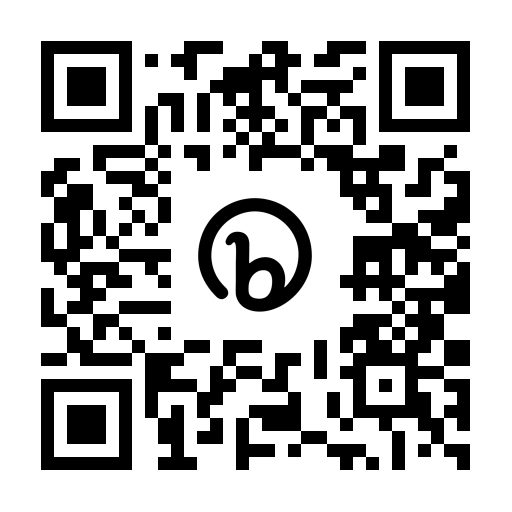

<span  style="font-size:16px;">

#### Future plan

We will keep developing the Juxtorpus to enable more functions and integrated with other toos and algorithm.  
We plan to run a full workshop during semester 2 and the Juxtorpus shall be officially released to the public before then.  
We will make our notebooks to connect to the text collections from the _LDaCA_ project so that besides uploading their own datasets, people can select and use published text collections for their research.  

#### Testdrive the Juxtorpus
If you would like to be an early adoptor and help us to test the tool and to provide feedbacks on bugs and improvements, please express your interest either in the feedback form, or send an email to me at [chao.sun@sydney.edu.au]().

#### Acknowledgement and citation
If the ATAP tools have been useful for your research project, we are keen to know about it.  
Please cite our notebook/software and acknowledge the Sydney Informatics Hub and ATAP project when you generate a reserach outcome from using our tools.
</span>

#### For inquiries about the ATAP project, please use:
**General Information and available tools**:  ATAP Website - [www.atap.edu.au](www.atap.edu.au)  
**New Project and Collaboration**:  ATAP USyd Academic Lead - [Prof. Monika Bednarek](mailto:monika.bednarek@sydney.edu.au)  
**Bug Report and Technical Questions**: Sydney Informatic Hub - [Dr Chao Sun](mailto:chao.sun@sydney.edu.au), [Jack Chan](mailto:huen.chan@sydney.edu.au)